# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Load Data and Initial View of Data

In [3]:
df = pd.read_csv('credit_card_transactions.csv')

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


# Data Transformations 

In [5]:
#Convert transaction date/time into separate columns
df[['trans_date', 'trans_time']] = df['trans_date_trans_time'].str.split(' ', expand=True)

In [6]:
#Set transaction date to datetime format
df['trans_date'] = pd.to_datetime(df['trans_date'])

In [7]:
#Set date of birth column to datetime format
df['dob'] = pd.to_datetime(df['dob'])

#Create Year of Birth Column
df['year_of_birth'] = df['dob'].dt.year

#Create Current Year Columns
df['year'] = df['trans_date'].dt.year

#Calculate Age Column
df['age'] = df['year'] - df['year_of_birth']

# Check for null values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 29 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  object        
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

# Set Seaborn theme 

In [9]:
sns.set_theme(style='whitegrid', font_scale=1)


# Exploratory Plots 

## Category Plots 

Text(0.5, 1.0, 'Count Plot of Category')

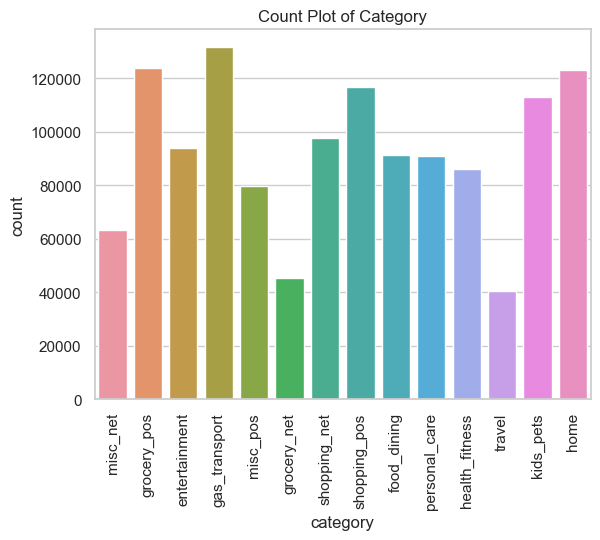

In [10]:
cat_dist = sns.countplot(x='category', data=df)
cat_dist.tick_params(axis='x', labelrotation=90)
cat_dist.set_title('Count Plot of Category')

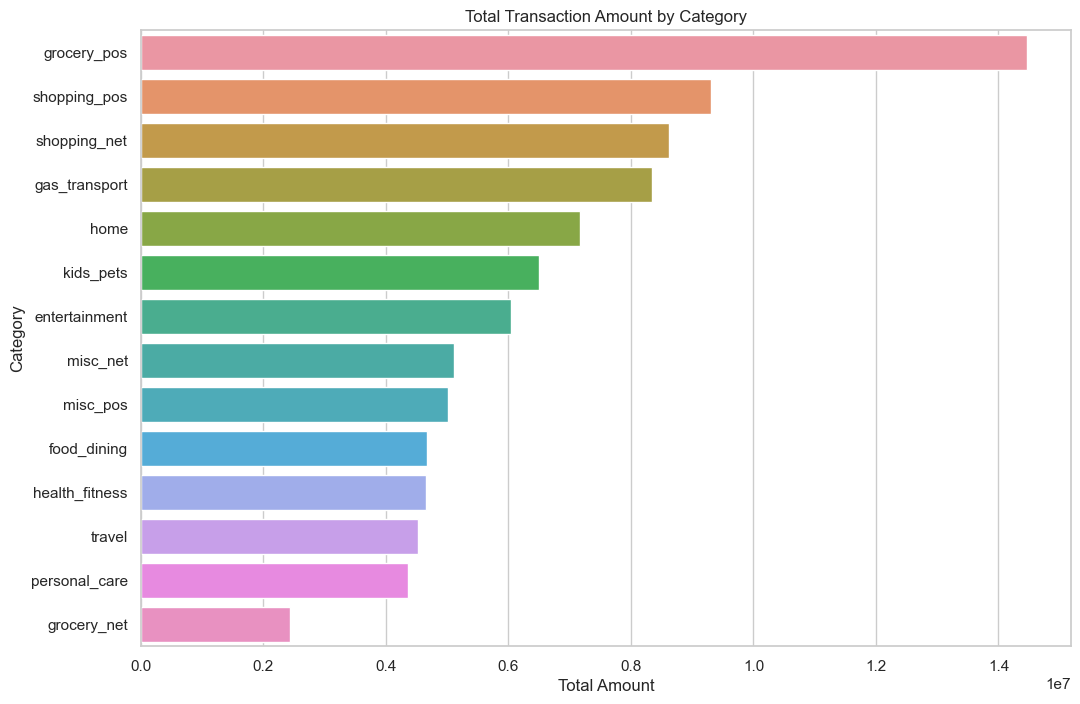

In [11]:
sorted = df.groupby('category')['amt'].sum().reset_index().sort_values('amt', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='amt', y='category', data=sorted)
plt.title('Total Transaction Amount by Category')
plt.xlabel('Total Amount')
plt.ylabel('Category')
plt.show()

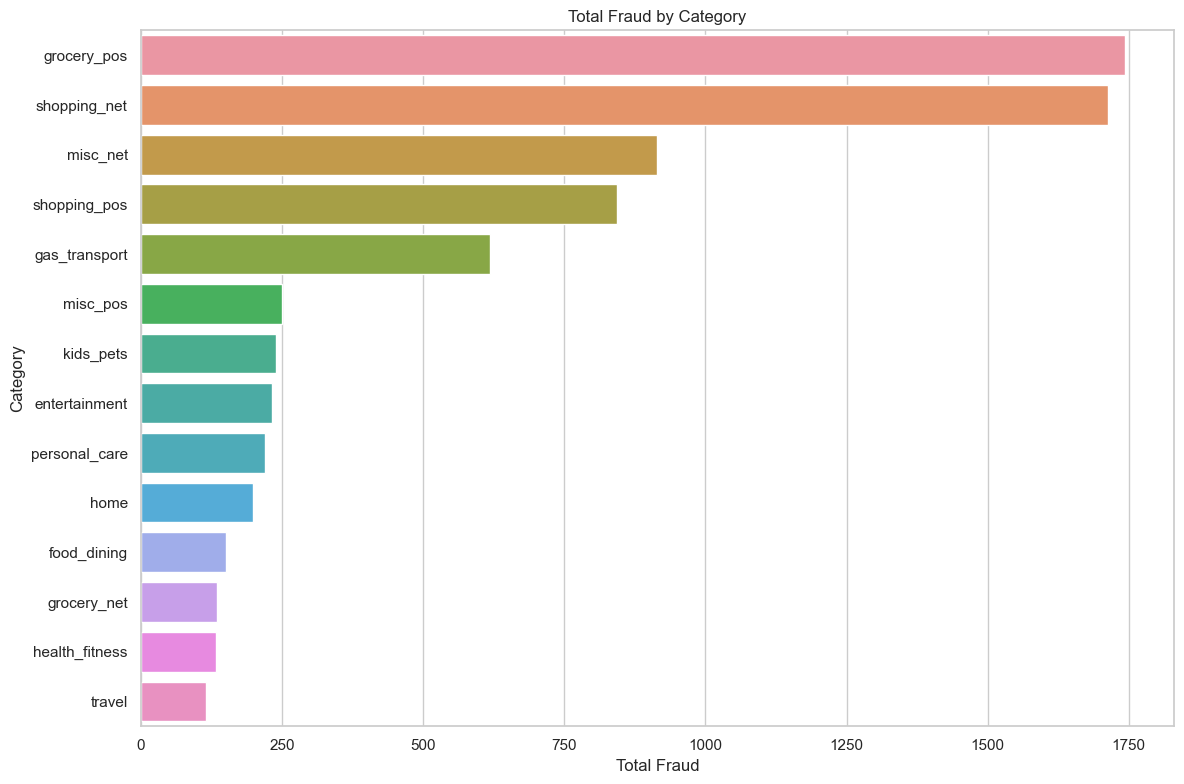

In [12]:
fraud_cat_totals = df.groupby('category')['is_fraud'].sum().reset_index()

# Sorting by amount in descending order
fraud_cat_totals = fraud_cat_totals.sort_values(by='is_fraud', ascending=False)

# Creating a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(y='category', x='is_fraud', data=fraud_cat_totals)
plt.title('Total Fraud by Category')
plt.xlabel('Total Fraud')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# Geographic Plots 

## Transactions

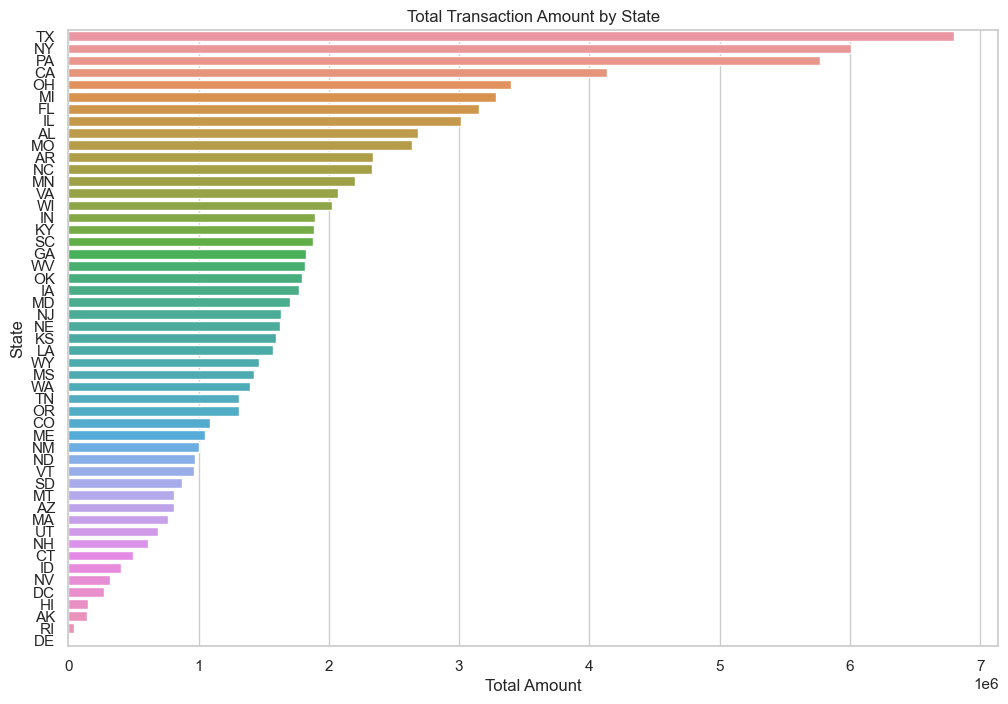

In [13]:
state_totals = df.groupby('state')['amt'].sum().reset_index()

# Sorting by amount in descending order
state_totals = state_totals.sort_values(by='amt', ascending=False)

# Creating a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(y='state', x='amt', data=state_totals)
plt.title('Total Transaction Amount by State')
plt.xlabel('Total Amount')
plt.ylabel('State')
plt.show()

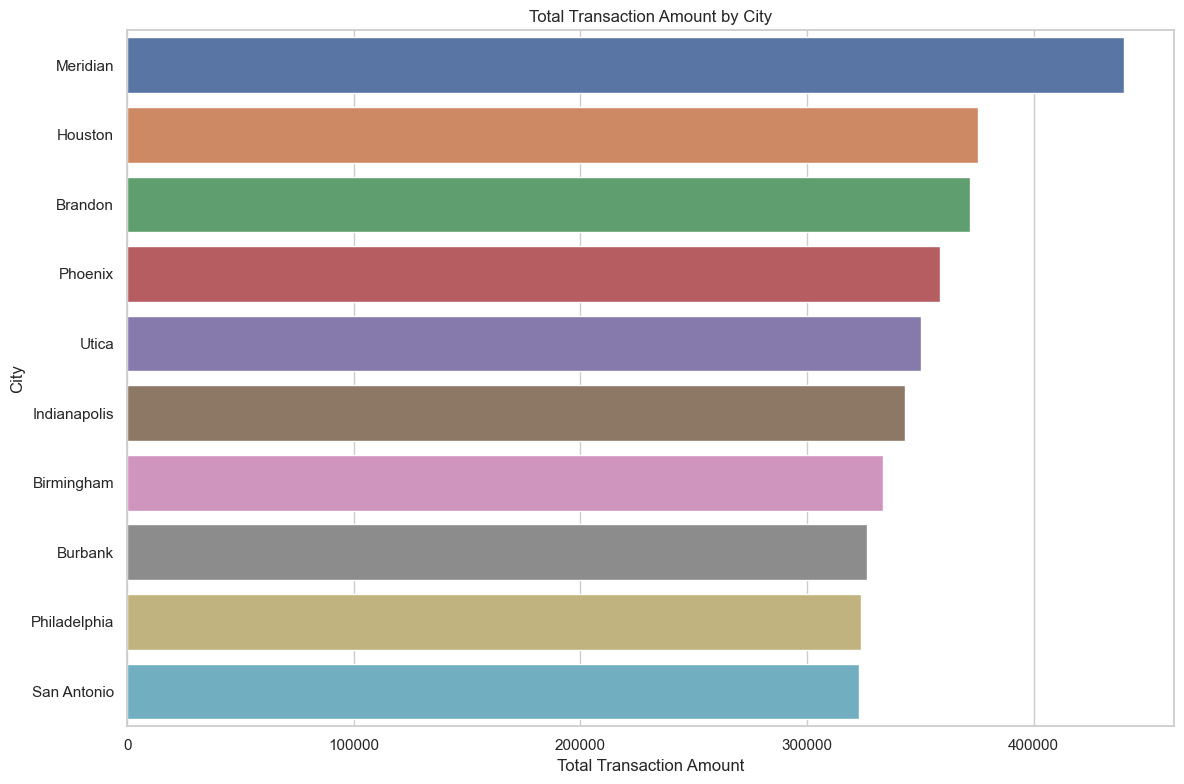

In [14]:
city_amt_totals = df.groupby('city')['amt'].sum().reset_index()

# Sorting by amount in descending order
city_amt_totals = city_amt_totals.sort_values(by='amt', ascending=False)

top_n = 10

city_amt_totals = city_amt_totals.head(top_n)

# Creating a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(y='city', x='amt', data=city_amt_totals)
plt.title('Total Transaction Amount by City')
plt.xlabel('Total Transaction Amount')
plt.ylabel('City')
plt.tight_layout()
plt.show()

## Fraud

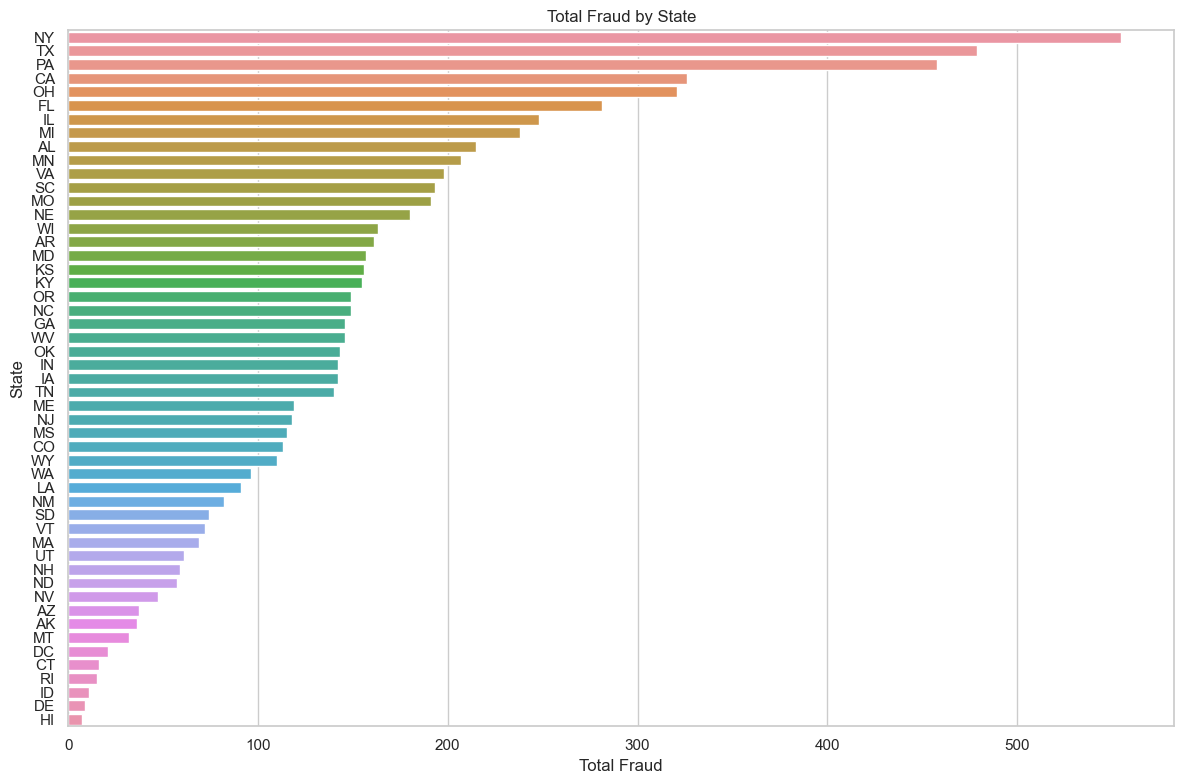

In [15]:
fraud_totals = df.groupby('state')['is_fraud'].sum().reset_index()

# Sorting by amount in descending order
fraud_totals = fraud_totals.sort_values(by='is_fraud', ascending=False)

# Creating a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(y='state', x='is_fraud', data=fraud_totals)
plt.title('Total Fraud by State')
plt.xlabel('Total Fraud')
plt.ylabel('State')
plt.tight_layout()
plt.show()

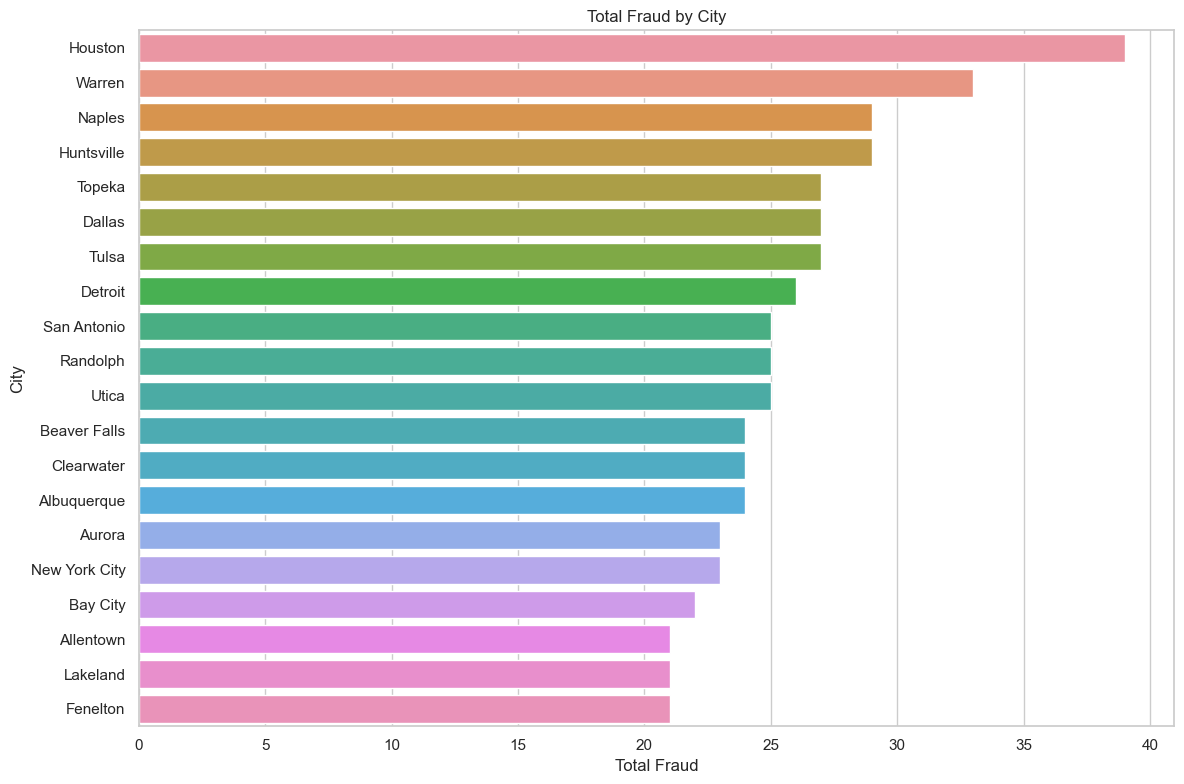

In [16]:
fraud_city_totals = df.groupby('city')['is_fraud'].sum().reset_index()

# Sorting by amount in descending order
fraud_city_totals = fraud_city_totals.sort_values(by='is_fraud', ascending=False)

top_n = 20

fraud_city_totals = fraud_city_totals.head(top_n)

# Creating a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(y='city', x='is_fraud', data=fraud_city_totals)
plt.title('Total Fraud by City')
plt.xlabel('Total Fraud')
plt.ylabel('City')
plt.tight_layout()
plt.show()

# Looking deeper into transaction amount 

##  Transaction amount histogram
### Due to the size of this dataset, I chose to conduct random sampling in order to better view the distribution of transaction amount

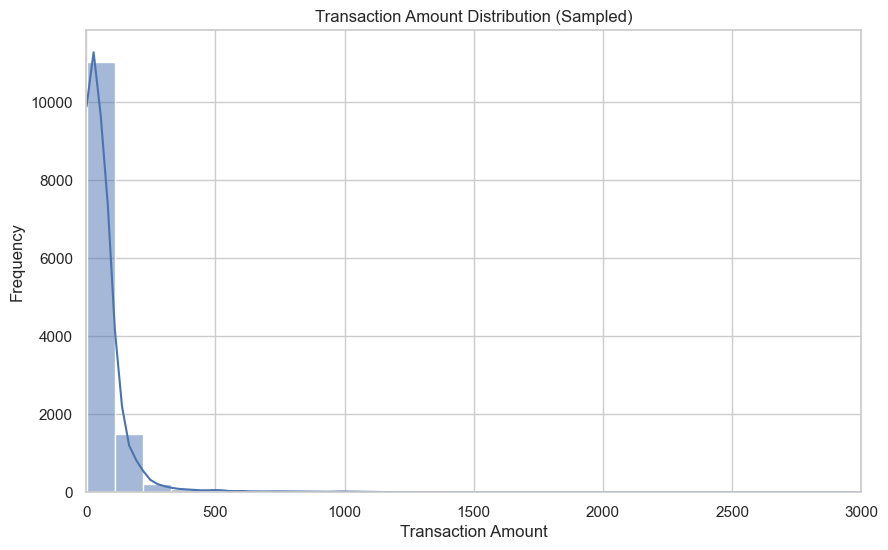

In [17]:
# Random sampling (1% of dataset)
sampled_df = df.sample(frac=0.01, random_state=42)

# Plotting histogram
plt.figure(figsize=(10, 6))
sns.histplot(sampled_df['amt'], bins=50, kde=True)
plt.title('Transaction Amount Distribution (Sampled)')
plt.xlabel('Transaction Amount')
plt.xticks(np.arange(0, sampled_df['amt'].max()+1, 500))
plt.xlim(0,3000)
plt.ylabel('Frequency')
plt.show()

###  Transaction amount is right skewed

# Time Series Analysis 

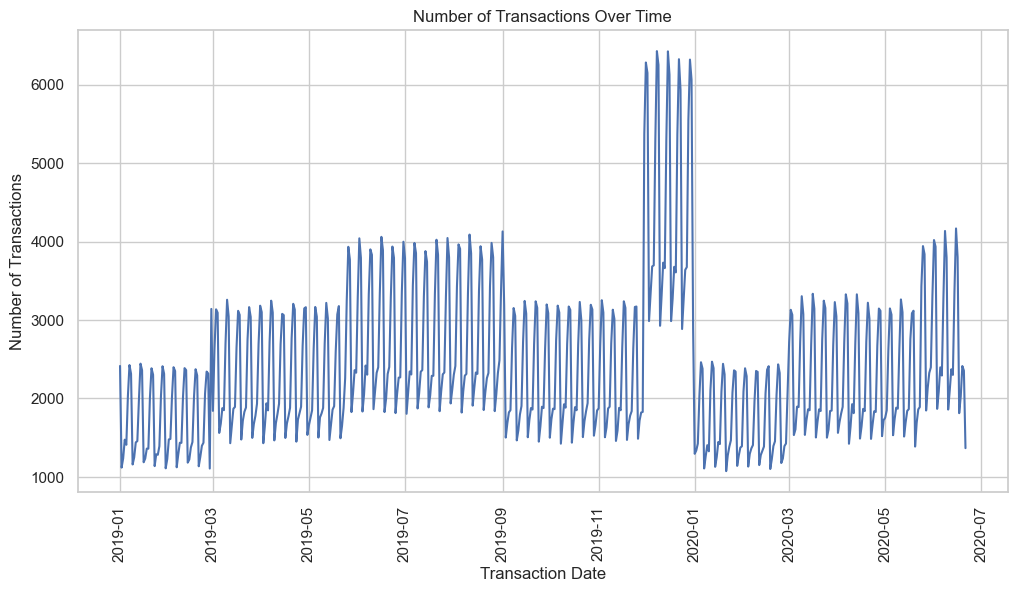

In [18]:
num_of_trans = df.groupby('trans_date').size().to_frame('num_of_trans').reset_index()
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.title('Number of Transactions Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Number of Transactions')
sns.lineplot(x='trans_date', y='num_of_trans', data = num_of_trans)
plt.grid(True)
plt.show()

# Age Plots 

<Axes: xlabel='age', ylabel='Count'>

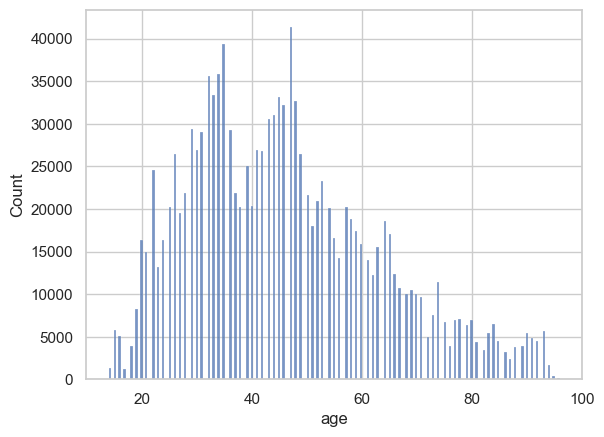

In [19]:
sns.histplot(df.age)

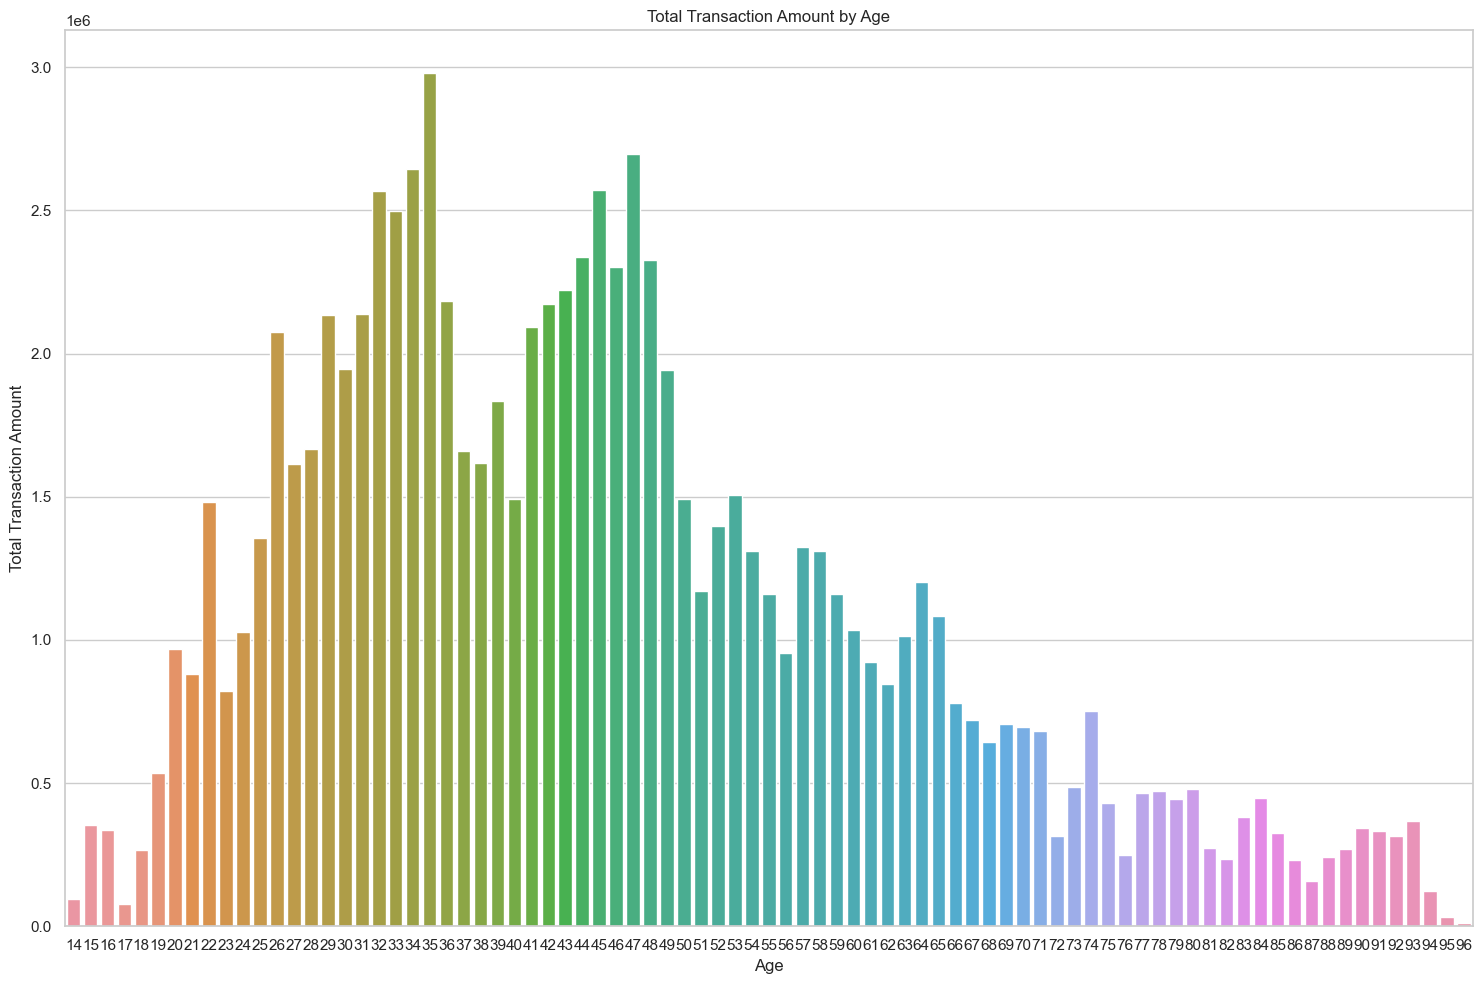

In [20]:
age_trans_totals = df.groupby('age')['amt'].sum().reset_index()

# Creating a bar plot
plt.figure(figsize=(15, 10))
sns.barplot(y='amt', x='age', data=age_trans_totals)
plt.title('Total Transaction Amount by Age')
plt.xlabel('Age')
plt.ylabel('Total Transaction Amount')
plt.tight_layout()
plt.show()

# K-means Cluster Analysis

## Create new dataset for analysis 

In [21]:
numeric = df[['cc_num', 'amt', 'city_pop', 'age']]
numeric = numeric.rename(columns={'cc_num':'ID'})
numeric = numeric.set_index('ID')

In [22]:
numeric.head()

,amt,city_pop,age
ID,,,
2703186189652095,4.97,3495,31
630423337322,107.23,149,41
38859492057661,220.11,4154,57
3534093764340240,45.00,1939,52
375534208663984,41.96,99,33


In [23]:
pd.options.display.float_format = '{:.2f}'.format

## Preprocessing 

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Scale Data 

In [25]:
scaler = StandardScaler()

In [26]:
numeric_scaled = scaler.fit_transform(numeric)

In [27]:
numeric_scaled

array([[-0.40782607, -0.28258876, -0.86462902],
       [ 0.23003923, -0.29366984, -0.28933334],
       [ 0.93414872, -0.28040632,  0.63113974],
       ...,
       [ 0.22193025, -0.29118603,  0.40102147],
       [ 0.02837499, -0.29043427, -0.34686291],
       [-0.41200532, -0.29344133, -1.20980643]])

In [28]:
#Create new df from scaled data
scaled_df = pd.DataFrame(numeric_scaled, index=numeric.index, columns=numeric.columns)


In [29]:
scaled_df.head()

,amt,city_pop,age
ID,,,
2703186189652095,-0.41,-0.28,-0.86
630423337322,0.23,-0.29,-0.29
38859492057661,0.93,-0.28,0.63
3534093764340240,-0.16,-0.29,0.34
375534208663984,-0.18,-0.29,-0.75


## Create function to work out optimum # of clusters
  

In [30]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []

    for k in range (1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    #Generate elbow plot
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show() 

## Optimization 

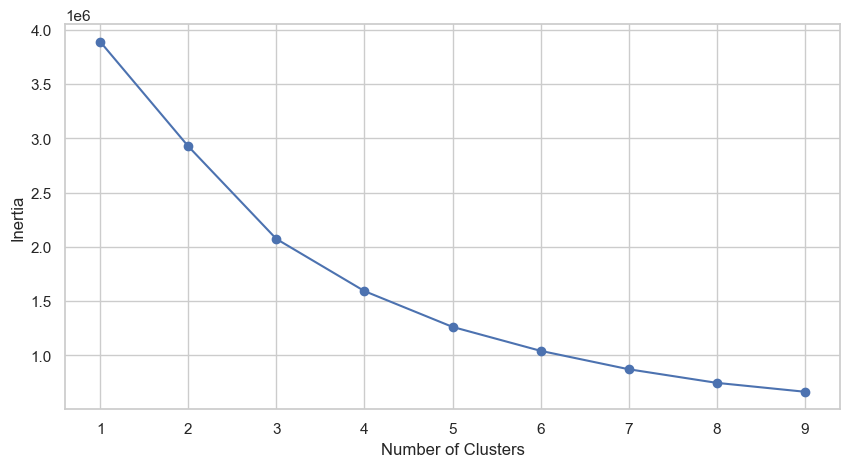

In [31]:
optimise_k_means(scaled_df, 10)

### Optimal number of clusters = 3

In [32]:
k_means = KMeans(n_clusters=3)

In [33]:
k_means.fit(scaled_df)

KMeans(n_clusters=3)

In [34]:
scaled_df['kmeans_3'] = k_means.labels_
scaled_df.head()

,amt,city_pop,age,kmeans_3
ID,,,,
2703186189652095,-0.41,-0.28,-0.86,0
630423337322,0.23,-0.29,-0.29,0
38859492057661,0.93,-0.28,0.63,1
3534093764340240,-0.16,-0.29,0.34,1
375534208663984,-0.18,-0.29,-0.75,0


## Plotting Results

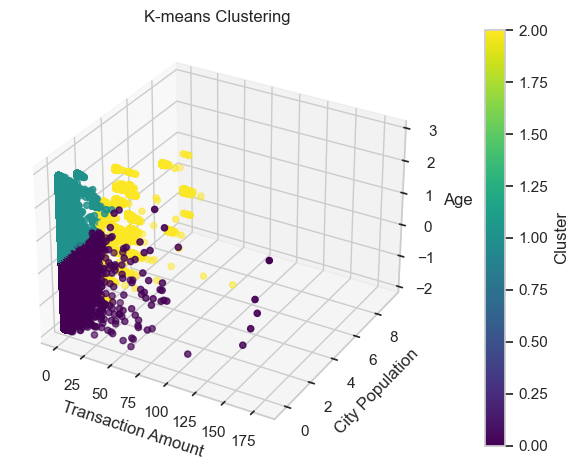

In [35]:
sns.set(style="whitegrid")  #Seaborn styling


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(scaled_df['amt'], scaled_df['city_pop'], scaled_df['age'], c=scaled_df['kmeans_3'], cmap='viridis')

# Add labels and title
ax.set_xlabel('Transaction Amount')
ax.set_ylabel('City Population')
ax.set_zlabel('Age')
plt.title('K-means Clustering')

# Add color bar
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)  # Adjust pad to avoid overlapping
cbar.set_label('Cluster')

plt.tight_layout()

plt.show()

Cluster 0 (Purple): Consists of data points with lower transaction amounts and city populations.

Cluster 1 (Teal): Consists of data points that are relatively balanced across all three variables.

Cluster 2 (Yellow): Includes data points with higher transaction amounts and city populations, and it encompasses a wide range of ages.

Overall conclusion of cluster analysis: Lower transaction amounts are clustered with lower city populations, while higher transaction amounts are clustered with higher city populations. 